(244, 2)


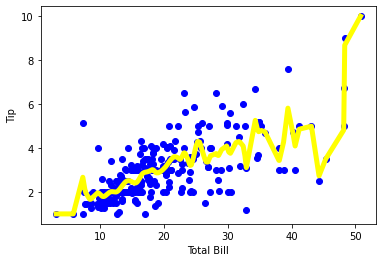

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gaussian kernel
def kernel(point, xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    
    for j in range(m):
        diff = point - X[j]
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * k**2))
    
    return weights

def localWeight(point, xmat, ymat, k):
    wt = kernel(point, xmat, k)
    W = (X.T * (wt*X)).I * (X.T * wt * ymat.T)
    return W

def localWeightRegression(xmat, ymat, k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    
    for i in range(m):
        ypred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)
        
    return ypred

data = pd.read_csv('locally.csv')
colA = np.array(data.total_bill)
colB = np.array(data.tip)

mcolA = np.mat(colA)
mcolB = np.mat(colB)

m = np.shape(mcolB)[1]
one = np.ones((1, m), dtype = int)

# horizontal stacking
X = np.hstack((one.T, mcolA.T))
print(X.shape)

ypred = localWeightRegression(X, mcolB, 0.5)

xsort = X.copy()
xsort.sort(axis=0)
plt.scatter(colA, colB, color='blue')
plt.plot(xsort[:, 1], ypred[X[:, 1].argsort(0)], color='yellow', linewidth=5)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()